# Classificação e exploração de textos sobre minério

- Base de dados: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
- Equbot: https://equbot.com/

## Importação das bibliotecas

In [1]:
!pip install spacy==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 26.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached thinc-7.4.0-cp39-cp39-linux_x86_64.whl
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached blis-0.4.1-cp39-cp39-linux_x86_64.whl
  Using cached srsly-1.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Created wheel for spacy: filename=spacy-2.2.4-cp39-cp39-linux_x86_64.whl size=29560113 sha256=917d215827e1ab1bf3faf8e1d83178f14dd8c0cb1003fbd657dfebf9ce36af69
  Stored in directory: /root/.cache/pip/wheels/ad/07/92/5f1eb398c6e7124a9cf7af79aa2c0d44a307bb229d1b361428
Successfully built spacy
  Attempting uninstall: w

In [2]:
import spacy
spacy.__version__

'2.2.4'

In [3]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

## Carregamento da base de dados

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/tweets_t.csv', on_bad_lines='skip', encoding='latin')

In [15]:
base.shape

(364, 2)

In [16]:
base.head()

,Data_publicacao,tweet
0,2022-01-20 05:29:04+00:00,Iron ore futures held above $130 a ton as Chin...
1,2022-01-19 04:44:05+00:00,Iron ore led gains among industrial metals as ...
2,2022-01-12 11:10:02+00:00,Iron ore advanced to the strongest level since...
3,2021-12-27 05:33:05+00:00,Iron ore decline as investors weighed expectat...
4,2021-12-21 04:47:03+00:00,Iron ore extended its storming rebound from an...


In [17]:
base.tail()

,Data_publicacao,tweet
359,2015-10-30 14:10:22+00:00,Iron ore set for third weekly loss after dropp...
360,2015-08-25 07:08:59+00:00,Mining giant BHP Billiton sees full-year profi...
361,2015-08-08 01:02:00+00:00,Rio Tinto Group's iron-ore earnings are being ...
362,2015-08-07 17:21:01+00:00,Rio Tinto Group's iron-ore earnings are being ...
363,2015-07-14 21:31:36+00:00,To cut or not to cut? Vale makes the first mov...


In [18]:
np.unique(base['sentiment'], return_counts=True)

KeyError: ignored

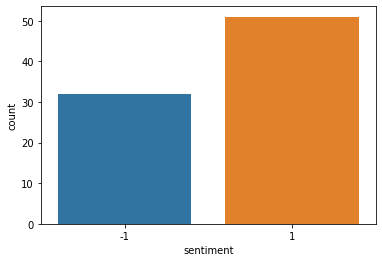

In [ ]:
sns.countplot(x = base['sentiment']);

In [19]:
base.isnull().sum()

Data_publicacao     0
tweet              13
dtype: int64

## Função para pré-processamento dos textos

In [20]:
!python -m spacy download pt

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-2.2.5/pt_core_news_sm-2.2.5.tar.gz#egg=pt_core_news_sm==2.2.5 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 252.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pt_core_news_sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=88e57a7e1cbb4abb58e974fd28ce90e7a1375e82e5c3ccd23c363790f9a6447e
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ht_h8bb/wheels/5c/94/e6/e5fcde8082892bba3338cb34245aa85eca33e10afbff13938a
Successfully built pt_core_news_sm
✔ Download and installation successful
You can now

In [21]:
spacy.load('pt')

AttributeError: ignored

In [22]:
print(spacy.lang.pt.stop_words.STOP_WORDS)

{'dezoito', 'fez', 'seria', 'fora', 'tens', 'oitava', 'de', 'quinta', 'estiveram', 'na', 'alguns', 'dezassete', 'esta', 'embora', 'final', 'logo', 'aquelas', 'iniciar', 'pela', 'vais', 'quem', 'tendes', 'tiveram', 'tempo', 'próximo', 'que', 'quanto', 'quarta', 'nenhuma', 'cujo', 'quinze', 'naquela', 'meses', 'menos', 'posso', 'no', 'próprio', 'em', 'onde', 'vossos', 'treze', 'quieta', 'ali', 'atrás', 'pouco', 'vez', 'acerca', 'dos', 'saber', 'cima', 'novas', 'seis', 'des', 'primeiro', 'nesse', 'estiveste', 'fazer', 'poderá', 'certamente', 'daquela', 'nós', 'vêm', 'pois', 'ter', 'número', 'apoia', 'vezes', 'essa', 'fazem', 'ainda', 'qual', 'dois', 'valor', 'terceiro', 'fostes', 'puderam', 'conselho', 'sistema', 'deverá', 'números', 'novos', 'oito', 'enquanto', 'bom', 'tu', 'mal', 'bem', 'posição', 'toda', 'desde', 'quer', 'tenho', 'naquele', 'irá', 'maior', 'ele', 'após', 'mil', 'dez', 'poder', 'tipo', 'sexta', 'todos', 'num', 'dezanove', 'suas', 'apenas', 'nem', 'diante', 'povo', 'foi'

In [23]:
import spacy.cli 
spacy.cli.download('en_core_web_md')

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [24]:
pln = spacy.load('en_core_web_md')
pln

AttributeError: ignored

In [ ]:
#pln = spacy.load('en')
#pln

OSError: ignored

In [ ]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{'next', 'from', 'seemed', 'get', 'now', 'us', 'call', '‘ve', 'whereafter', 'nevertheless', 'toward', 'will', 'we', 'who', 'have', 'wherever', 'am', 'against', 'done', 'full', 'neither', 'keep', 'both', 'last', 'move', 'himself', 'however', 'go', 'twelve', 'amongst', 'above', 'in', '’re', 'should', 'became', 'while', 'give', 'up', 'everywhere', 'why', 'him', 'none', 'quite', 'by', 'yourselves', 'nine', 'anyway', 'three', 'front', 'my', 'yours', 'seeming', 'when', 'whatever', 'each', '’ll', 'do', 'all', 'throughout', 'via', 'hundred', 'been', 'below', 'afterwards', 'else', 'say', 'some', 'yourself', 'although', 'name', 'at', 'enough', 'bottom', 'even', 'yet', 'own', 'he', 'than', 'sometime', 'onto', 'her', 'two', 'serious', 'being', 'whereas', 'noone', 'ours', 'every', 'indeed', 'eight', 'due', 'former', 'among', 'side', 'ever', 'what', 'amount', 'thence', 'four', 'our', 'be', 'might', 'formerly', "'ll", 'does', 'that', 'whereupon', 'thus', 'on', 'with', 'there', 'mostly', 'third', 'nor

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'buy apple stock care caring car'

## Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base.head(10)

,Data_publicacao,tweet,sentiment
0,2019-07-25 14:09:31,The mining industry is starting to split on wh...,-1
1,2019-07-25 11:39:55,The mining industry is starting to split on wh...,-1
2,2019-07-25 10:35:06,Anglo American plans to buy back up to $1 bill...,1
3,2019-07-20 13:00:06,Vale's second-quarter production due next week...,1
4,2019-07-19 19:59:06,Vale's second-quarter production due next week...,-1
5,2019-07-17 02:39:57,BHP forecasts iron ore production will rise as...,-1
6,2019-07-12 17:08:21,|Forget about oil bonds and tech. This tiny E...,1
7,2019-07-12 07:38:02,The world’s largest mining company says it cou...,-1
8,2019-07-04 07:02:08,|Iron ore prices race past $120 triggering wa...,1
9,2019-07-03 05:34:10,Australia trade surplus rockets to record on r...,1


In [ ]:
base['tweet'] = base['tweet'].apply(preprocessamento)

In [ ]:
base.head(10)

,Data_publicacao,tweet,sentiment
0,2019-07-25 14:09:31,mining industry start split bear responsibilit...,-1
1,2019-07-25 11:39:55,mining industry start split bear responsibilit...,-1
2,2019-07-25 10:35:06,anglo american plan buy billion share diversif...,1
3,2019-07-20 13:00:06,vale second quarter production week offer clue...,1
4,2019-07-19 19:59:06,vale second quarter production week offer clue...,-1
5,2019-07-17 02:39:57,bhp forecast iron ore production rise fiscal y...,-1
6,2019-07-12 17:08:21,|forget oil bond tech tiny etf gain far july,1
7,2019-07-12 07:38:02,world large mining company -PRON- build iron o...,-1
8,2019-07-04 07:02:08,|iron ore price race past trigger warning,1
9,2019-07-03 05:34:10,australia trade surplus rocket record resurgen...,1


## Visualização e exploração

### Número médio de caracteres

In [ ]:
base['tamanho'] = base['tweet'].apply(len)
base.head()

,Data_publicacao,tweet,sentiment,tamanho
0,2019-07-25 14:09:31,mining industry start split bear responsibilit...,-1,79
1,2019-07-25 11:39:55,mining industry start split bear responsibilit...,-1,79
2,2019-07-25 10:35:06,anglo american plan buy billion share diversif...,1,76
3,2019-07-20 13:00:06,vale second quarter production week offer clue...,1,59
4,2019-07-19 19:59:06,vale second quarter production week offer clue...,-1,59


In [ ]:
base['tamanho'].describe()

count    83.000000
mean     60.000000
std      19.629495
min      21.000000
25%      44.500000
50%      60.000000
75%      75.500000
max      99.000000
Name: tamanho, dtype: float64

In [ ]:
positivo = base[base['sentiment'] == 1]

In [ ]:
positivo['tamanho'].describe()

count    51.000000
mean     63.431373
std      20.147709
min      21.000000
25%      47.000000
50%      67.000000
75%      76.500000
max      95.000000
Name: tamanho, dtype: float64

In [ ]:
negativo = base[base['sentiment'] == -1]

In [ ]:
negativo['tamanho'].describe()

count    32.000000
mean     54.531250
std      17.727297
min      30.000000
25%      40.000000
50%      53.000000
75%      64.500000
max      99.000000
Name: tamanho, dtype: float64

### Nuvem de palavras

In [ ]:
textos_positivos = positivo['tweet'].tolist()
len(textos_positivos)

51

In [ ]:
textos_positivos[0:10]

['anglo american plan buy billion share diversified miner reap bumper profit …',
 'vale second quarter production week offer clue end shortage',
 '|forget oil bond tech tiny etf gain far july',
 '|iron ore price race past trigger warning',
 'australia trade surplus rocket record resurgent iron ore',
 'millennial ’ shopping habit help fuel hefty gain australian hedge fund year',
 'millennial ’ shopping habit help fuel hefty gain australian hedge fund year',
 'iron ore price near year high asia steelmaker warn -PRON- seek pass su …',
 'iron ore price near year high asia steelmaker warn -PRON- seek pass su …',
 'iron ore surge high 📈']

In [ ]:
textos_positivos_string = ' '.join(textos_positivos)

In [ ]:
textos_positivos_string

'anglo american plan buy billion share diversified miner reap bumper profit … vale second quarter production week offer clue end shortage |forget oil bond tech tiny etf gain far july |iron ore price race past trigger warning australia trade surplus rocket record resurgent iron ore millennial ’ shopping habit help fuel hefty gain australian hedge fund year millennial ’ shopping habit help fuel hefty gain australian hedge fund year iron ore price near year high asia steelmaker warn -PRON- seek pass su … iron ore price near year high asia steelmaker warn -PRON- seek pass su … iron ore surge high 📈 |from pork china iron ore brazil inflation flicker global economy |from pork china iron ore brazil inflation flicker global economy |from pork china iron ore brazil inflation flicker global economy |iron ore poise hit ton thank low seaborne cargo possible pick chinese … world big iron ore export port expect timely boost shipment iron ore thunder higher cyclone lurk west australia near key export

In [ ]:
len(textos_positivos_string)

3285

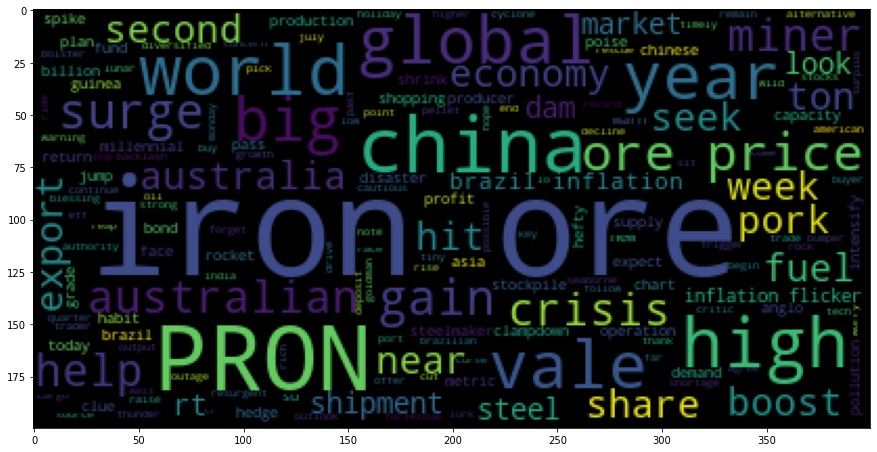

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [ ]:
lista_negativo = negativo['tweet'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [ ]:
len(textos_negativos_string)

1776

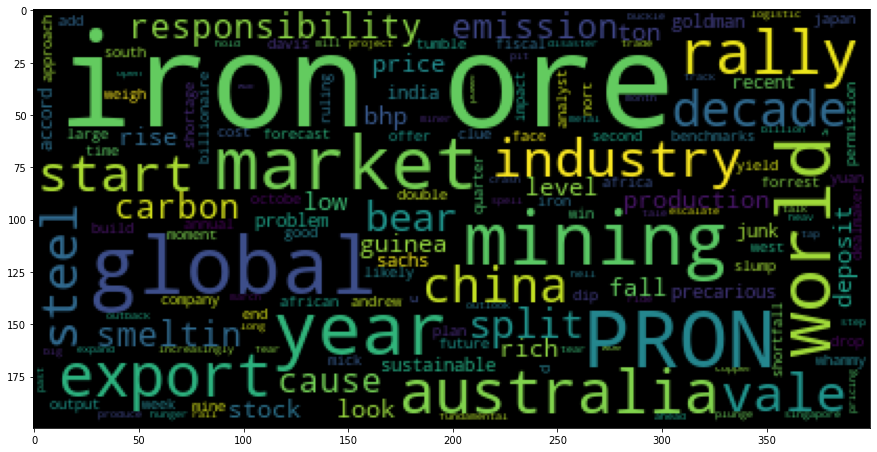

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(textos_negativos_string));

### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
documento = pln(textos_positivos_string)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
empresas_positivas = []
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_positivas.append(entidade.text)

|guinea sit rich iron ore ORG
-PRON- ORG
goldman -PRON- big critic ORG
rand watch iron ore ORG
brucutu iron ore -PRON- court ORG
-PRON- ORG
|iron ore rocket supply ORG
vale sa dam ORG
-PRON- ORG
sierra leone ORG


In [ ]:
len(empresas_positivas)

10

In [ ]:
empresas_positivas = set(empresas_positivas)

In [ ]:
len(empresas_positivas)

8

In [ ]:
print(empresas_positivas)

{'vale sa dam', 'sierra leone', 'rand watch iron ore', '|guinea sit rich iron ore', 'brucutu iron ore -PRON- court', '|iron ore rocket supply', '-PRON-', 'goldman -PRON- big critic'}


In [ ]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_negativas.append(entidade.text)

goldman sachs ORG
goldman sachs vale ORG
disaster australia iron ore outback global iron ore market ORG
|the world iron ore ORG
|iron ore ORG


In [ ]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

5

In [ ]:
print(empresas_negativas)

{'|iron ore', '|the world iron ore', 'goldman sachs vale', 'goldman sachs', 'disaster australia iron ore outback global iron ore market'}


In [ ]:
x = {"A", "B", "C"}
y = {'A', "D", "E"}
x.intersection(y)

{'A'}

In [ ]:
x.difference(y), y.difference(x)

({'B', 'C'}, {'D', 'E'})

In [ ]:
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [ ]:
len(empresas_positivas_negativas)

0

In [ ]:
print(empresas_positivas_negativas)

set()


In [ ]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
len(empresas_somente_positivas)

8

In [ ]:
print(empresas_somente_positivas)

{'vale sa dam', 'sierra leone', 'rand watch iron ore', '|guinea sit rich iron ore', 'brucutu iron ore -PRON- court', '|iron ore rocket supply', '-PRON-', 'goldman -PRON- big critic'}


In [ ]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
len(empresas_somente_negativas)

5

In [ ]:
print(empresas_somente_negativas)

{'|iron ore', '|the world iron ore', 'goldman sachs vale', 'goldman sachs', 'disaster australia iron ore outback global iron ore market'}


## Tratamento da base de dados

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/stock_data.csv')

In [ ]:
#base.drop(['tamanho'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size = 0.3)

In [ ]:
base_treinamento.shape

(4053, 2)

In [ ]:
base_teste.shape

(1738, 2)

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
  if sentimento == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif sentimento == -1:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  base_treinamento_final.append([texto, dic.copy()])

In [ ]:
base_treinamento_final[10:15]

[['AMD Chooo Choo pop to bankruptcy?', {'NEGATIVO': True, 'POSITIVO': False}],
 ['CHK weekly bullish engulfing   ', {'NEGATIVO': False, 'POSITIVO': True}],
 ['EA nice move (long)', {'NEGATIVO': False, 'POSITIVO': True}],
 ['CM dollar roll.', {'NEGATIVO': True, 'POSITIVO': False}],
 ['Coronavirus Crisis: State-Run Banks Allow Borrowers 3-Month Delay In EMIs\nhttps://t.co/0FQ1oEOp0y',
  {'NEGATIVO': True, 'POSITIVO': False}]]

In [ ]:
len(base_treinamento_final)

4053

## Criação do classificador

spacy usa redes neurais para o treinamento

In [ ]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [ ]:
4053 / 512

7.916015625

In [ ]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treinamento_final)
  erros = {}
  for batch in spacy.util.minibatch(base_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=erros)
    historico.append(erros)
  if epoca % 1 == 0:
    print(erros)

{'textcat': 1.4558742122972035e-05}
{'textcat': 9.70092014540569e-06}
{'textcat': 5.917786495501787e-06}
{'textcat': 3.0211106150090927e-06}
{'textcat': 1.3329530474948115e-06}


In [ ]:
historico_erro = []
for i in historico:
  historico_erro.append(i.get('textcat'))

In [ ]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.45587421e-05, 1.45587421e-05, 1.45587421e-05, 1.45587421e-05,
       1.45587421e-05, 1.45587421e-05, 1.45587421e-05, 1.45587421e-05,
       9.70092015e-06, 9.70092015e-06, 9.70092015e-06, 9.70092015e-06,
       9.70092015e-06, 9.70092015e-06, 9.70092015e-06, 9.70092015e-06,
       5.91778650e-06, 5.91778650e-06, 5.91778650e-06, 5.91778650e-06,
       5.91778650e-06, 5.91778650e-06, 5.91778650e-06, 5.91778650e-06,
       3.02111062e-06, 3.02111062e-06, 3.02111062e-06, 3.02111062e-06,
       3.02111062e-06, 3.02111062e-06, 3.02111062e-06, 3.02111062e-06,
       1.33295305e-06, 1.33295305e-06, 1.33295305e-06, 1.33295305e-06,
       1.33295305e-06, 1.33295305e-06, 1.33295305e-06, 1.33295305e-06])

Text(0, 0.5, 'Erro')

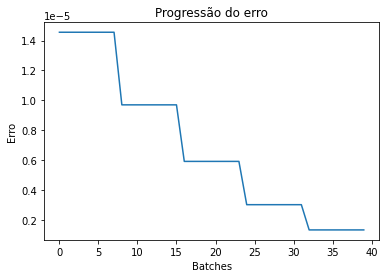

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk('modelo')

## Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
base_teste.head(10)

,Text,Sentiment
576,"BAC failed to break below, uptrend continues",1
3755,MCP possible grind to 6.70-75,1
4032,NKE still in this 6 week consolidation base. B...,1
3893,SK the long awaited short squeeze will not hap...,-1
1374,AAP Hmmm ower on Volume.... Will see...,-1
5314,The March jobs report shows the start of a col...,-1
706,GW Higher volume on the way down as the news ...,-1
3409,"HES broke intraday bollinger band top, now c&h...",1
4021,TXN raises 1Q13 earnings & revs to upper end o...,1
3912,i think we'll see aapl at sub 430s by the end ...,-1


### Texto positivo

In [ ]:
base_teste.shape

(1738, 2)

In [ ]:
texto_positivo = base_teste['Text'][576]
texto_positivo

'BAC failed to break below, uptrend continues'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

BAC failed to break below, uptrend continues

In [ ]:
previsao.cats

{'NEGATIVO': 0.6040475964546204, 'POSITIVO': 0.4079076945781708}

In [ ]:
texto_positivo = 'Apple stock is increasing and I will buy for a good price'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'apple stock increase buy good price'

In [ ]:
modelo_carregado(texto_positivo).cats

{'NEGATIVO': 0.17285951972007751, 'POSITIVO': 0.8690284490585327}

### Texto negativo

In [ ]:
texto_negativo = base_teste['Text'][3893]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.05047871172428131, 'POSITIVO': 0.857664942741394}

## Avaliação do modelo

In [ ]:
previsoes = []
for texto in base_teste['Text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes[0:5]

[{'NEGATIVO': 0.6040475964546204, 'POSITIVO': 0.4079076945781708},
 {'NEGATIVO': 0.2535170018672943, 'POSITIVO': 0.7151556015014648},
 {'NEGATIVO': 0.0034017846919596195, 'POSITIVO': 0.9846248626708984},
 {'NEGATIVO': 0.05047871172428131, 'POSITIVO': 0.857664942741394},
 {'NEGATIVO': 0.47834402322769165, 'POSITIVO': 0.47911226749420166}]

In [ ]:
len(previsoes)

1738

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final, np.unique(previsoes_final)

(array([-1,  1,  1, ...,  1, -1,  1]), array([-1,  1]))

In [ ]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([ 1,  1,  1, ...,  1, -1,  1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7295742232451093

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[349, 286],
       [184, 919]])

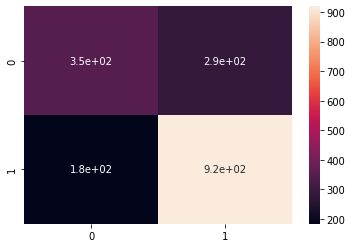

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.65      0.55      0.60       635
           1       0.76      0.83      0.80      1103

    accuracy                           0.73      1738
   macro avg       0.71      0.69      0.70      1738
weighted avg       0.72      0.73      0.72      1738



Previsão sobre texto somente minério

In [ ]:
base_minerio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/analise-dados-master/dados/tweets_rot.csv')

In [ ]:
previsoes = []
for texto in base_minerio['tweet']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes[0:5]

[{'NEGATIVO': 0.9116879105567932, 'POSITIVO': 0.15177860856056213},
 {'NEGATIVO': 0.8470513820648193, 'POSITIVO': 0.22579899430274963},
 {'NEGATIVO': 0.17510120570659637, 'POSITIVO': 0.6881698369979858},
 {'NEGATIVO': 0.5064699649810791, 'POSITIVO': 0.36437609791755676},
 {'NEGATIVO': 0.48047560453414917, 'POSITIVO': 0.39268746972084045}]

In [ ]:
len(previsoes)

83

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final, np.unique(previsoes_final)

(array([-1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
         1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([-1,  1]))

In [ ]:
respostas_reais = base_minerio['sentiment'].values
respostas_reais

array([-1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.6385542168674698

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[12, 20],
       [10, 41]])

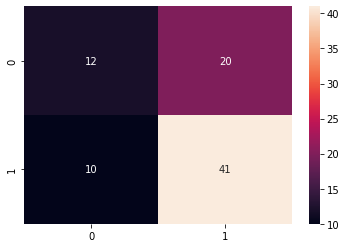

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.55      0.38      0.44        32
           1       0.67      0.80      0.73        51

    accuracy                           0.64        83
   macro avg       0.61      0.59      0.59        83
weighted avg       0.62      0.64      0.62        83

